# Importaciones

In [1]:
import copy as cp
import numpy as np
import plotly.graph_objects as go
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from prettytable import PrettyTable

# Identificación

In [2]:
csv_path = os.path.join("/content/drive/MyDrive/Datasets/netflix_titles.csv")
netflix = pd.read_csv(csv_path)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Breve descripción de cada columna:**

*   Show_id = id de cada título
*   type = si es una película o una serie
*   title = título del programa
*   director = director del programa
*   cast = actores del programa
*   country = país en el que se rodó
*   date_added = fecha en la que se introduce el programa
*   release_year = año de lanzamiento
*   rating = empresa que realiza el rating
*   duration = duración del programa
*   listed_in = categoría a la que pertenece
*   description = breve descripción

**Cantidad de valores únicos de cada columna:**

In [4]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

# Obtener la lista de valores nulos por columna

In [5]:
valores_nulos_por_columna = netflix.isnull().sum()

columnas_con_nulos = valores_nulos_por_columna[valores_nulos_por_columna > 0]

print("Columnas con valores nulos:")
print(columnas_con_nulos)

Columnas con valores nulos:
director      2634
cast           825
country        831
date_added      10
rating           4
duration         3
dtype: int64


**Gran cantidad de valores nulos por falta de información de cada una de las columnas, especialmente las columnas "director" y "cast", que podrían ser rellenadas fácilmente.**

# Primer análisis de los datos

**Número de películas que hace cada director**

In [6]:
netflix[netflix["type"] == "Movie"]["director"].value_counts()

Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: director, Length: 4354, dtype: int64

**Número de series que hace cada director**

In [7]:
netflix[netflix["type"] == "TV Show"]["director"].value_counts()

Alastair Fothergill                  3
Rob Seidenglanz                      2
Hsu Fu-chun                          2
Iginio Straffi                       2
Shin Won-ho                          2
                                    ..
Juliana Vicente                      1
Chang Chin-jung, Chen Rong-hui       1
Thierry Demaizière, Alban Teurlai    1
Manolo Caro                          1
Michael Cumming                      1
Name: director, Length: 222, dtype: int64

**Número de empresas que se repiten en los ratings**

In [8]:
netflix["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

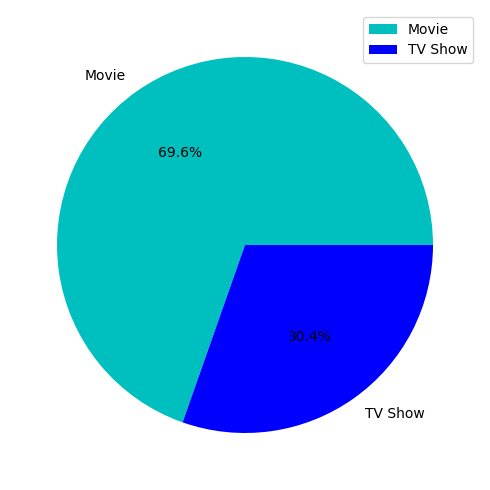

In [9]:
type_show = netflix['type'].value_counts()
plt.figure(figsize = (5,5))
plt.pie(type_show,
        labels= type_show.index ,
        autopct= '%1.1f%%' ,
        colors = ['c' , 'b'])
plt.legend()
plt.tight_layout()
plt.show()

**Vemos que la mayoría del dataset está ocupado por películas**

In [10]:
netflix.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Cambiando el formato de la fecha

**Cambio el formato utilizando "to_datetime" y así deje de ser una string**

In [11]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce', infer_datetime_format=True)

**Número de programas por cada uno de los géneros**

In [12]:
genre_counts = netflix['listed_in'].value_counts()

print("Cantidad de programas por género:")
print(genre_counts)

Cantidad de programas por género:
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64


**Elimino los valores nulos y en todas las películas cambio la duración para que sea un int en lugar de una string**

In [13]:
netflix = netflix.dropna()
copiadf = cp.deepcopy(netflix)
copiadf = netflix[netflix['type'] == 'Movie']
copiadf['duration'] = copiadf['duration'].str.replace(' min', '').astype(int)

<ipython-input-13-b5e916f3f3cd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copiadf['duration'] = copiadf['duration'].str.replace(' min', '').astype(int)


**Separo cada uno de los géneros para obtener valores más precisos**

<ipython-input-14-9046bdf3e193>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copiadf['genres'] = copiadf['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)


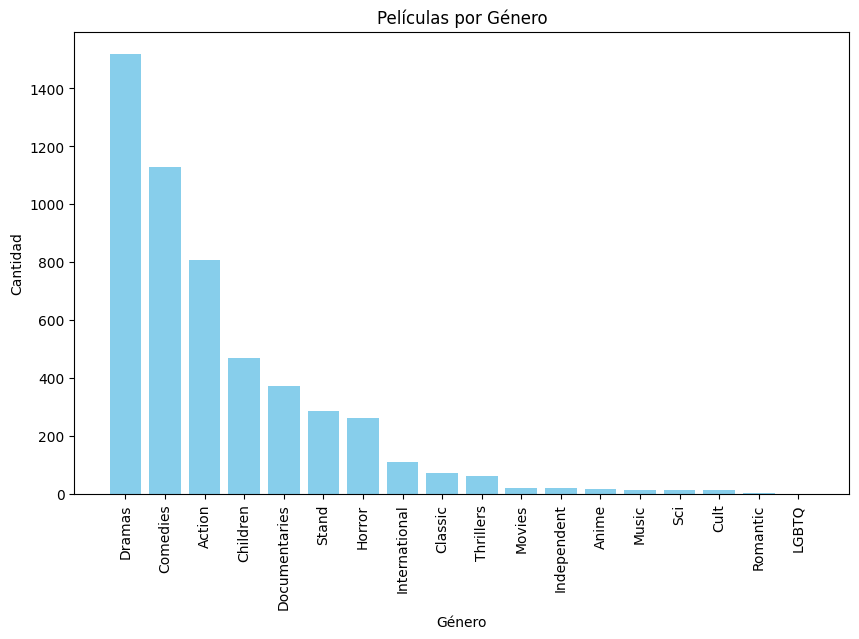

In [14]:
copiadf['genres'] = copiadf['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)

genre_counts_movie = copiadf['genres'].value_counts().reset_index()

genre_counts_movie.columns = ['genre', 'count']

plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genre'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Películas por Género')
plt.xticks(rotation=90)
plt.show()

**Vemos para cada género el número de películas**

In [15]:
trace = go.Histogram(
    x=copiadf['duration'],
    xbins=dict(size=0.5),
    marker=dict(color='rgb(26, 118, 255)')
)

layout = go.Layout(
    template="plotly_dark",
    title='Distribución de la Duración de las Películas',
    xaxis=dict(title='Duración')
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()

**Dos gráficos relacionados con la duración de las películas**

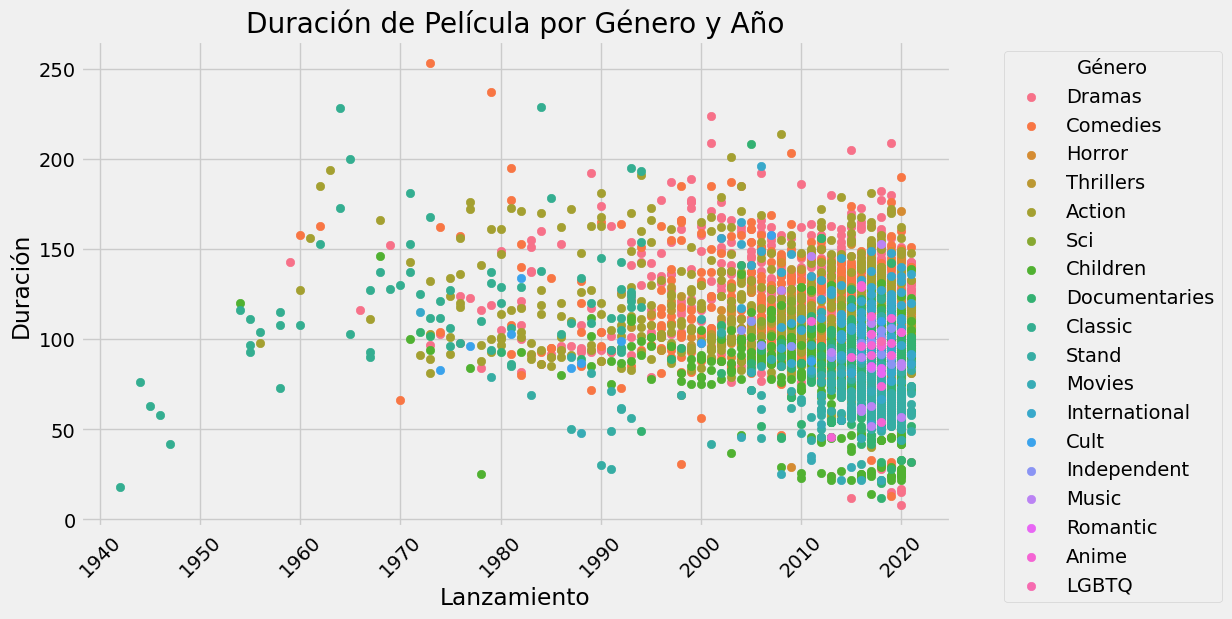

In [16]:
plt.style.use('fivethirtyeight')

palette = sns.color_palette("husl", len(copiadf['genres'].unique()))

plt.figure(figsize=(10, 6))
for i, genre in enumerate(copiadf['genres'].unique()):
    plt.scatter(copiadf['release_year'][copiadf['genres'] == genre],
                copiadf['duration'][copiadf['genres'] == genre],
                label=genre,
                color=palette[i])

plt.xlabel('Lanzamiento')
plt.ylabel('Duración')
plt.title('Duración de Película por Género y Año')
plt.xticks(rotation=45)

plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [17]:
min_duration_index = copiadf['duration'].idxmin()

corresponding_min_release_year = copiadf.loc[min_duration_index, 'release_year']
min_duration = copiadf.loc[min_duration_index, 'duration']

print(f"La película con menos duración dura {min_duration} minutos y fue lanzada en {corresponding_min_release_year}.")

max_duration_index = copiadf['duration'].idxmax()

corresponding_max_release_year = copiadf.loc[max_duration_index, 'release_year']
max_duration = copiadf.loc[max_duration_index, 'duration']

print(f"La película con más duración dura {max_duration} minutos y fue lanzada en {corresponding_max_release_year}.")

La película con menos duración dura 8 minutos y fue lanzada en 2020.
La película con más duración dura 253 minutos y fue lanzada en 1973.


In [18]:
min_duration_index = copiadf['date_added'].idxmin()
corresponding_min_added = copiadf.loc[min_duration_index, 'date_added']

print(f"La película más antigua del dataset fue añadida en {corresponding_min_added}.")

max_duration_index = copiadf['date_added'].idxmax()
corresponding_max_added = copiadf.loc[max_duration_index, 'date_added']

print(f"La película más moderna del dataset fue añadida en {corresponding_max_added}.")

La película más antigua del dataset fue añadida en 2008-01-01 00:00:00.
La película más moderna del dataset fue añadida en 2021-09-24 00:00:00.


# Análisis profundo

**Trabajo con los outliers del año de lanzamiento y el año en el que se agregan a Netflix**

In [19]:
copiadf['release_year'] = pd.to_numeric(copiadf['release_year'], errors='coerce')

q1 = copiadf['date_added'].quantile(0.25)
q3 = copiadf['date_added'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

copiadf['date_added'] = copiadf['date_added'].clip(lower=lower_bound, upper=upper_bound)

q1 = copiadf['release_year'].quantile(0.25)
q3 = copiadf['release_year'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

copiadf['release_year'] = copiadf['release_year'].clip(lower=lower_bound, upper=upper_bound)
copiadf['release_year'].nunique()

<ipython-input-19-355edf71dc10>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-355edf71dc10>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-19-355edf71dc10>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



22

**Comprobación del trabajo realizado con los outliers**

In [20]:
min_duration_index = copiadf['date_added'].idxmin()
corresponding_min_added = copiadf.loc[min_duration_index, 'date_added']

print(f"La película más antigua del dataset fue añadida en {corresponding_min_added}.")

max_duration_index = copiadf['date_added'].idxmax()
corresponding_max_added = copiadf.loc[max_duration_index, 'date_added']

print(f"La película más moderna del dataset fue añadida en {corresponding_max_added}.")

La película más antigua del dataset fue añadida en 2014-12-21 12:00:00.
La película más moderna del dataset fue añadida en 2021-09-24 00:00:00.


**Ahora utilizo un OneHotEncoder para modificar la columna tipo y tener dos columnas, TV Show y Movie, con valores 0 y 1**

In [21]:
netflix_type = netflix[["type"]]
netflix.dropna(inplace= True)
netflix_enc3 = OneHotEncoder(sparse=False)
housing_netflix_3hot = netflix_enc3.fit_transform(netflix_type)

netflix.reset_index(drop=False, inplace=True)
netflix=netflix.join(pd.DataFrame(housing_netflix_3hot, columns=[net for net in netflix_enc3.categories_[0]]))
netflix=netflix.drop(["type"], axis=1)

netflix.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



Index(['index', 'show_id', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description', 'Movie', 'TV Show'],
      dtype='object')

**No existe ningún tipo de correlación relevante**

In [22]:
copia_df = netflix.copy()
corr_copia = copia_df.corr()
corr_copia["release_year"].sort_values(ascending=False).head()

<ipython-input-22-9e45e8fb7436>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



release_year    1.000000
TV Show         0.078566
Movie          -0.078566
index          -0.180914
Name: release_year, dtype: float64

**Utilizando las columnas después del OneHotEncoder**

In [23]:
netflix.groupby(['country', 'Movie'])['country'].value_counts().sort_values(ascending = False).iloc[0:10]

country         Movie  country       
United States   1.0    United States     1819
India           1.0    India              868
United Kingdom  1.0    United Kingdom     164
Canada          1.0    Canada             104
Egypt           1.0    Egypt               90
Spain           1.0    Spain               84
Nigeria         1.0    Nigeria             84
Indonesia       1.0    Indonesia           76
Turkey          1.0    Turkey              74
Philippines     1.0    Philippines         73
Name: country, dtype: int64

In [24]:
netflix.groupby(['release_year', 'Movie'])['release_year'].value_counts().sort_values(ascending = False).iloc[0:15]

release_year  Movie  release_year
2017          1.0    2017            640
2018          1.0    2018            632
2016          1.0    2016            567
2019          1.0    2019            495
2020          1.0    2020            409
2015          1.0    2015            340
2014          1.0    2014            234
2013          1.0    2013            195
2012          1.0    2012            159
2021          1.0    2021            146
2010          1.0    2010            139
2011          1.0    2011            132
2009          1.0    2009            112
2008          1.0    2008            110
2006          1.0    2006             80
Name: release_year, dtype: int64

In [25]:
netflix.groupby(['listed_in', 'Movie'])['listed_in'].value_counts().sort_values(ascending = False).iloc[0:10]

listed_in                                         Movie  listed_in                                       
Dramas, International Movies                      1.0    Dramas, International Movies                        336
Stand-Up Comedy                                   1.0    Stand-Up Comedy                                     286
Comedies, Dramas, International Movies            1.0    Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies  1.0    Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                1.0    Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies     1.0    Dramas, International Movies, Romantic Movies       160
Documentaries                                     1.0    Documentaries                                       156
Comedies, International Movies                    1.0    Comedies, International Movies                

In [26]:
netflix['duration_num'] = netflix['duration'].str.extract('(\d+)', expand=False).astype(float)
netflix = netflix.drop('duration', axis=1)

In [27]:
grouped_data = netflix[netflix['country'] == 'Spain'].groupby('director')['title'].apply(list).reset_index(name='titles_list')

table = PrettyTable()
table.field_names = ["Director", "Títulos"]

for index, row in grouped_data.iterrows():
    table.add_row([row['director'], "\n".join(row['titles_list'])])

print(table)

+-----------------------------------+---------------------------------------------+
|              Director             |                   Títulos                   |
+-----------------------------------+---------------------------------------------+
|         Agustí Villaronga         |               Uncertain Glory               |
|      Aitor Arregi, Jon Garaño     |                  The Giant                  |
|         Alberto Rodríguez         |               Smoke & Mirrors               |
|           Alexis Morante          |       Heroes: Silence and Rock & Roll       |
|                                   |              Camarón: The Film              |
|     Alfonso Cortés-Cavanillas     |                The Silent War               |
|         Alfonso Rodríguez         |          Pocoyo & The Space Circus          |
|           Borja Cobeaga           |                 Bomb Scared                 |
|           Carles Torras           |                The Paramedic          

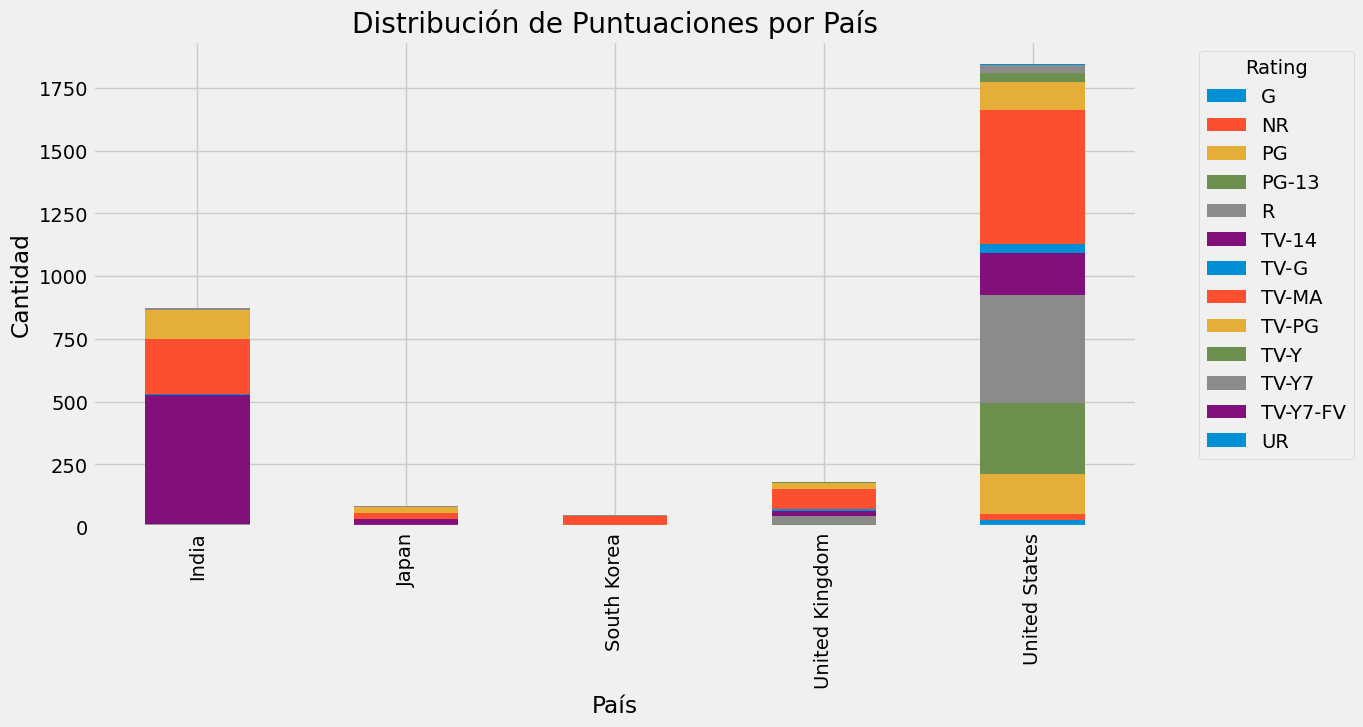

In [28]:
countries = ['United States', 'United Kingdom', 'India', 'South Korea', 'Japan']
filtered_df = netflix[netflix['country'].isin(countries)]
rating_counts = filtered_df.groupby(['country', 'rating']).size().unstack()
rating_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('País')
plt.ylabel('Cantidad')
plt.title('Distribución de Puntuaciones por País')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

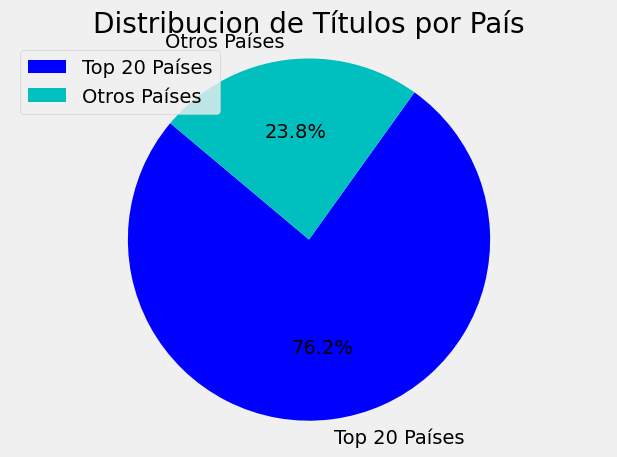

In [29]:
top_countries = netflix['country'].value_counts().head(20)
total_titles = len(netflix)
percentage_top20 = top_countries.sum() / total_titles * 100
percentage_other = 100 - percentage_top20
labels = ['Top 20 Países', 'Otros Países']
values = [percentage_top20, percentage_other]
plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
       colors = ['b' , 'c'])
plt.title('Distribucion de Títulos por País')
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x800 with 0 Axes>

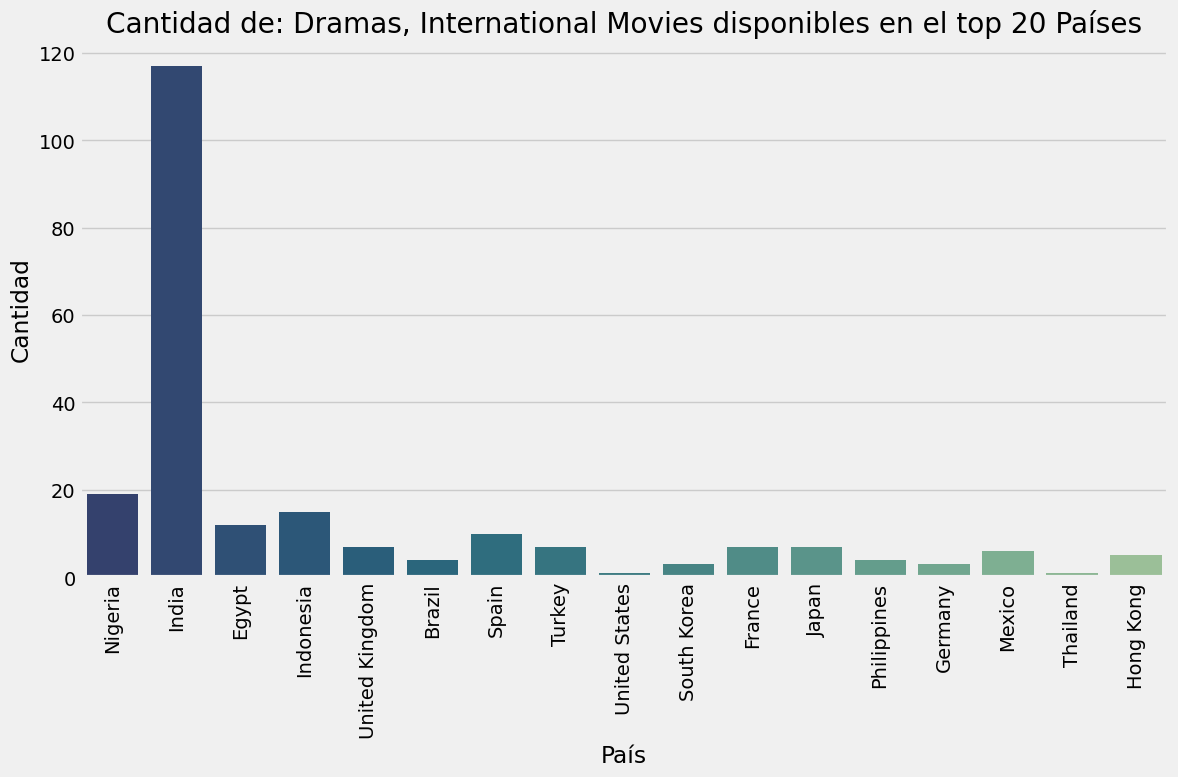

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




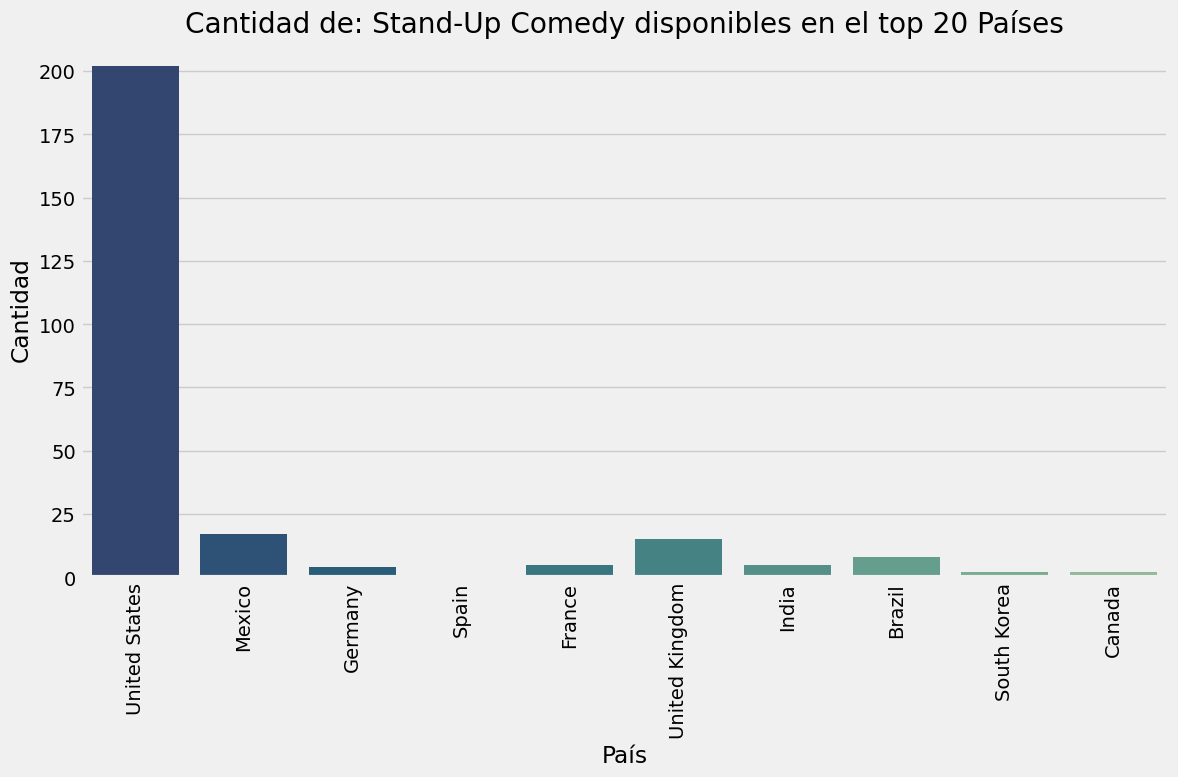

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




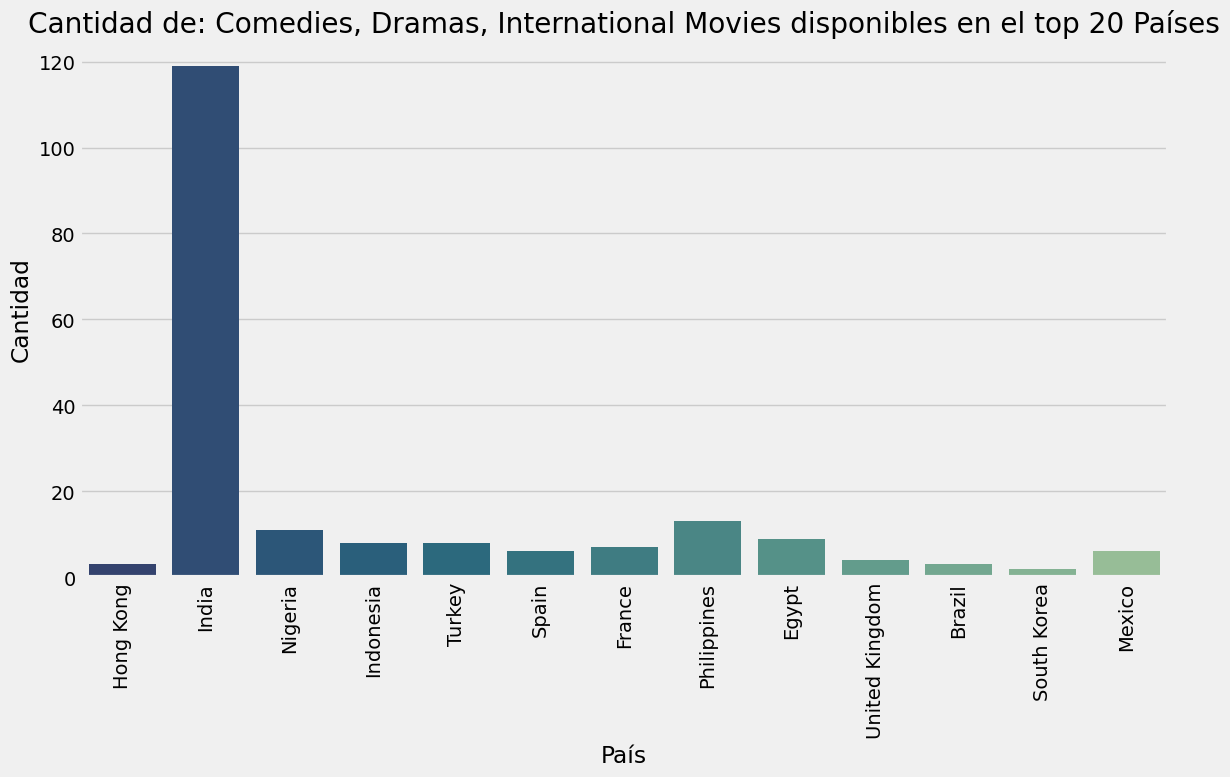

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




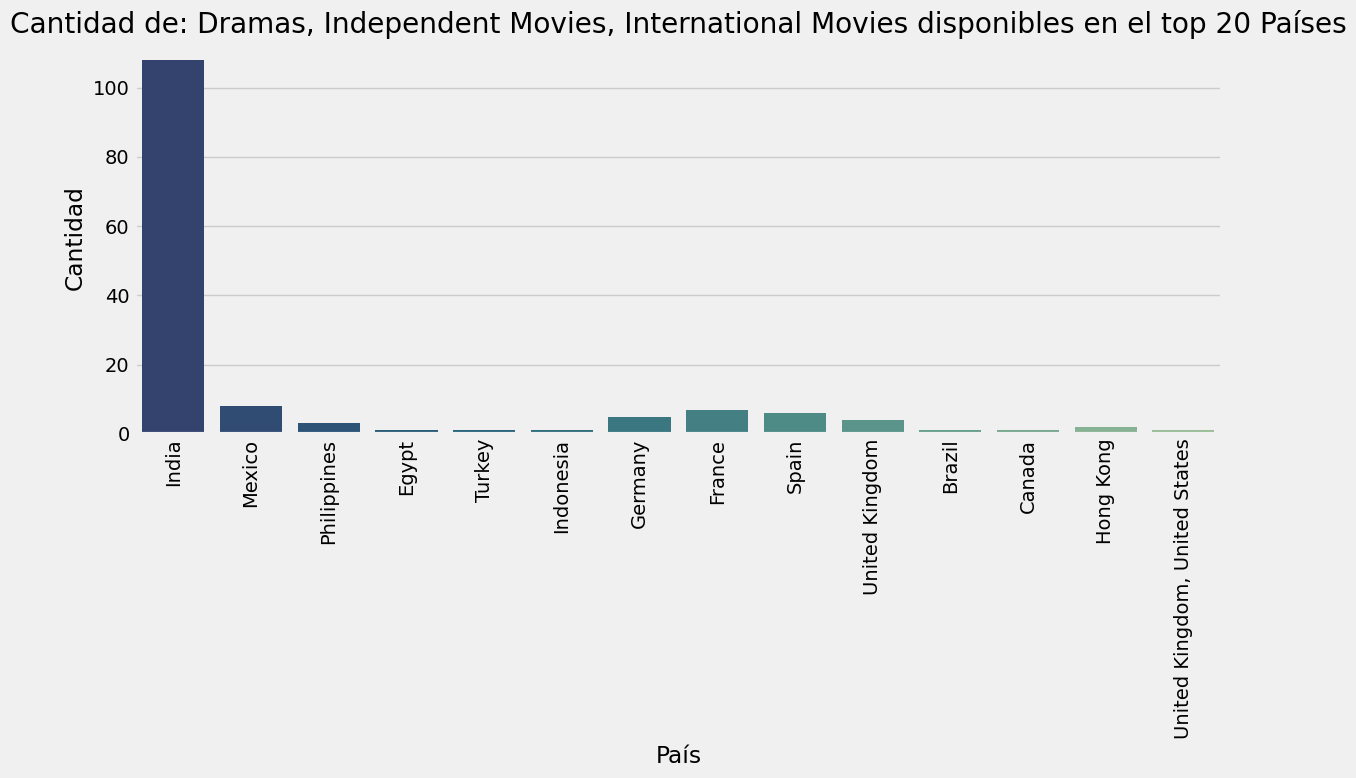

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




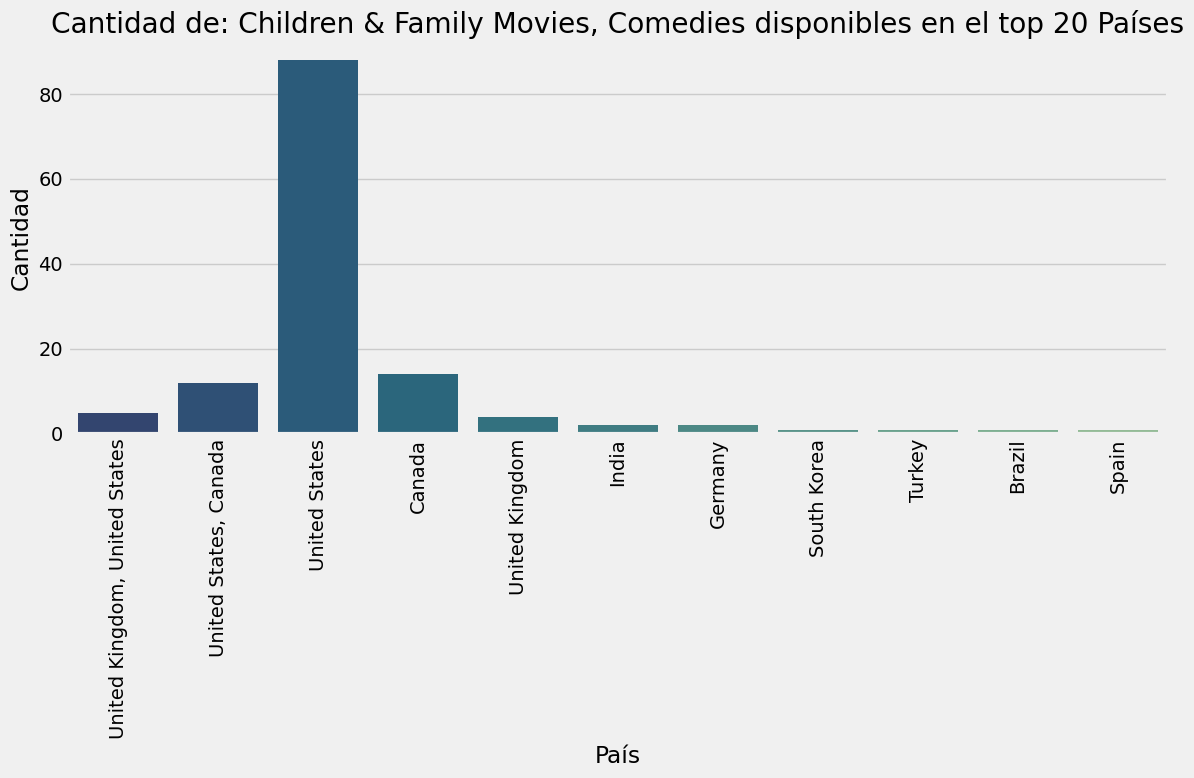

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




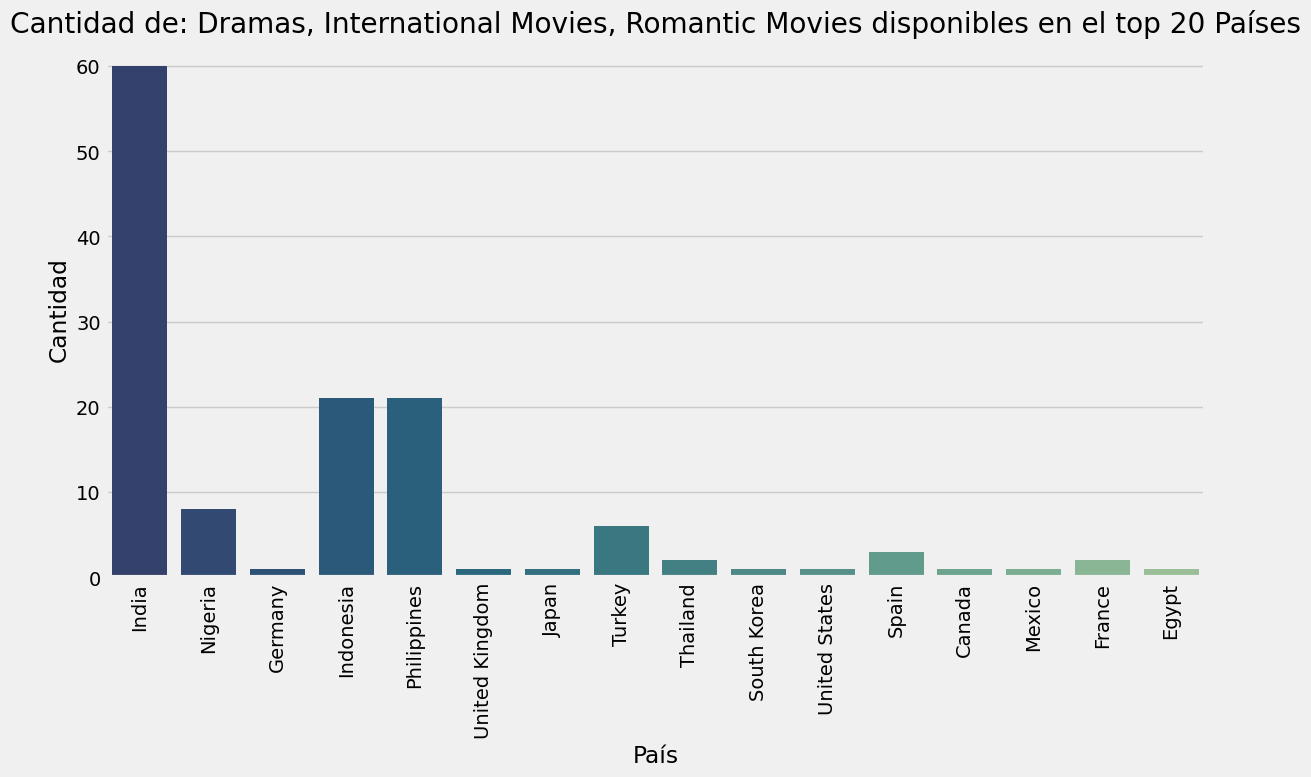

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




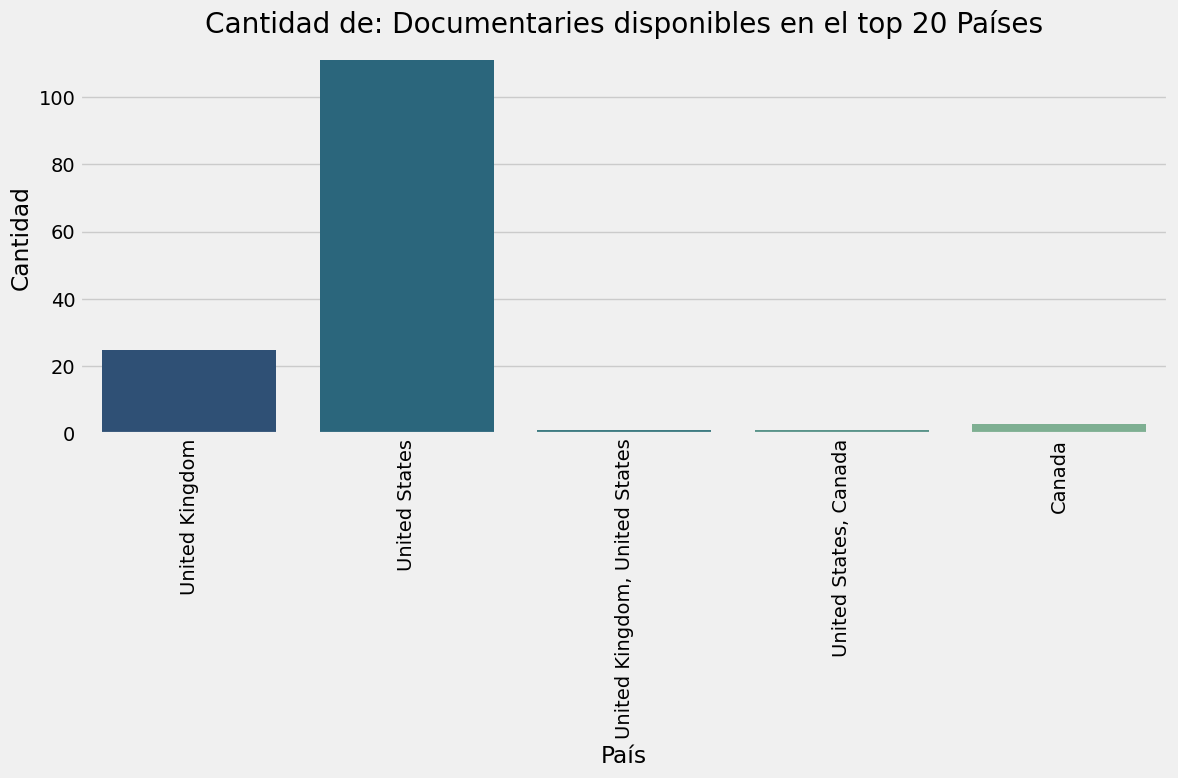

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




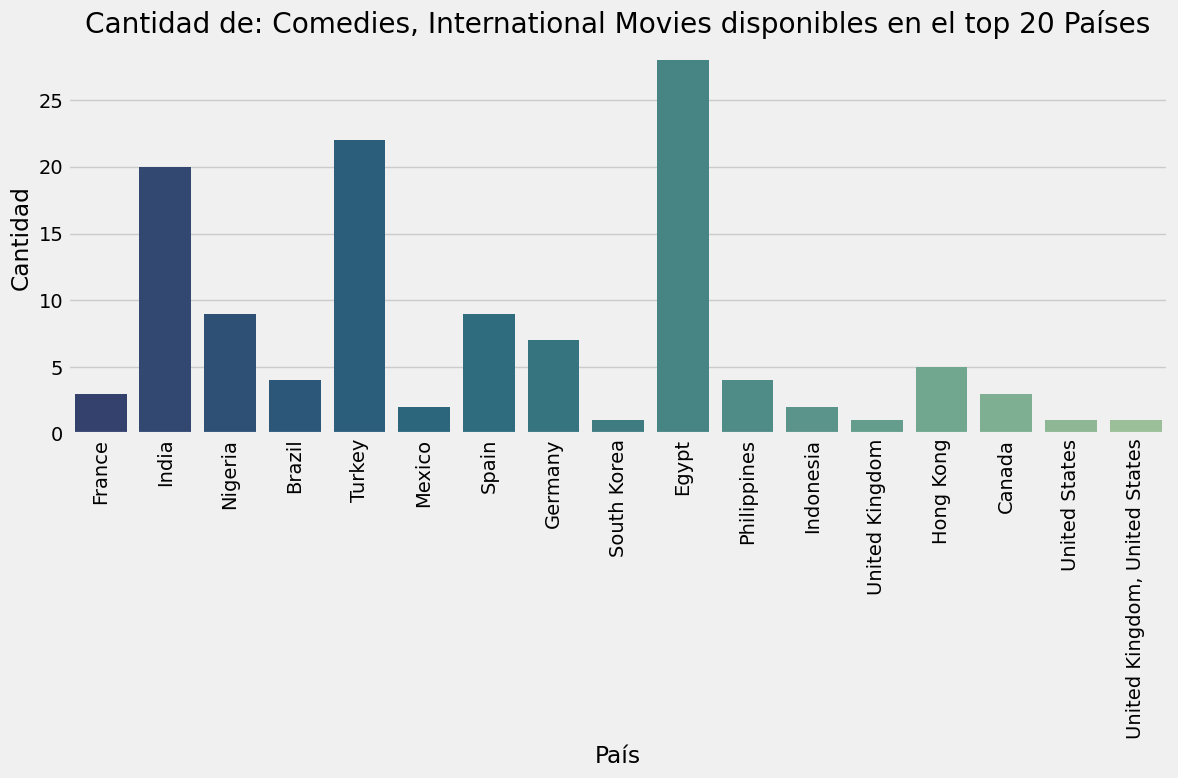

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




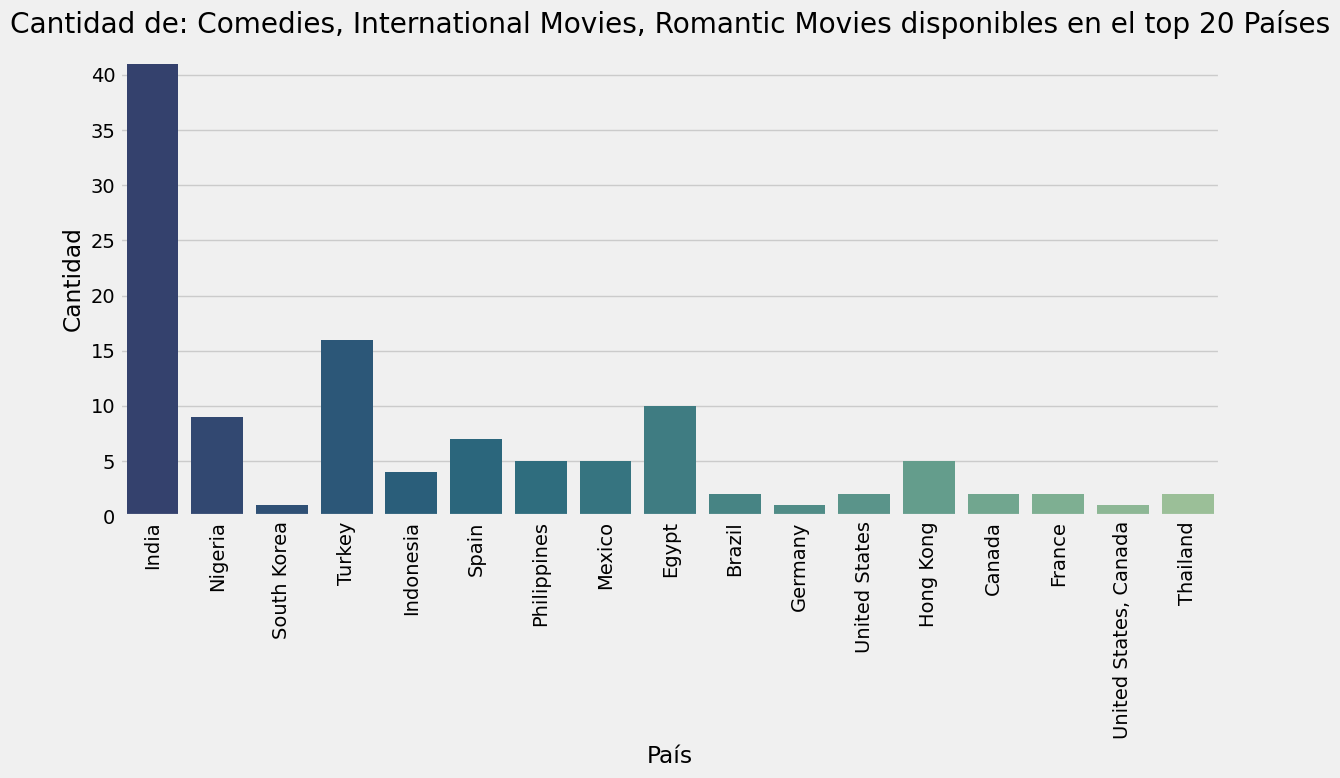

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




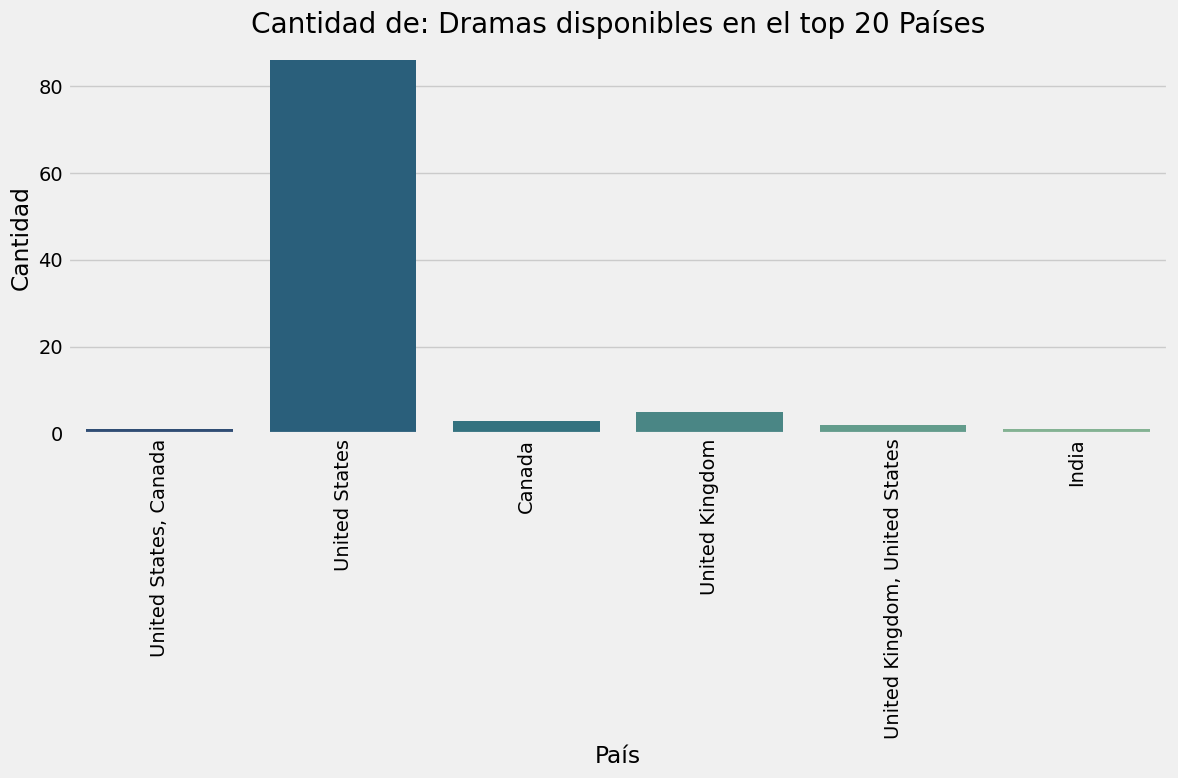

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




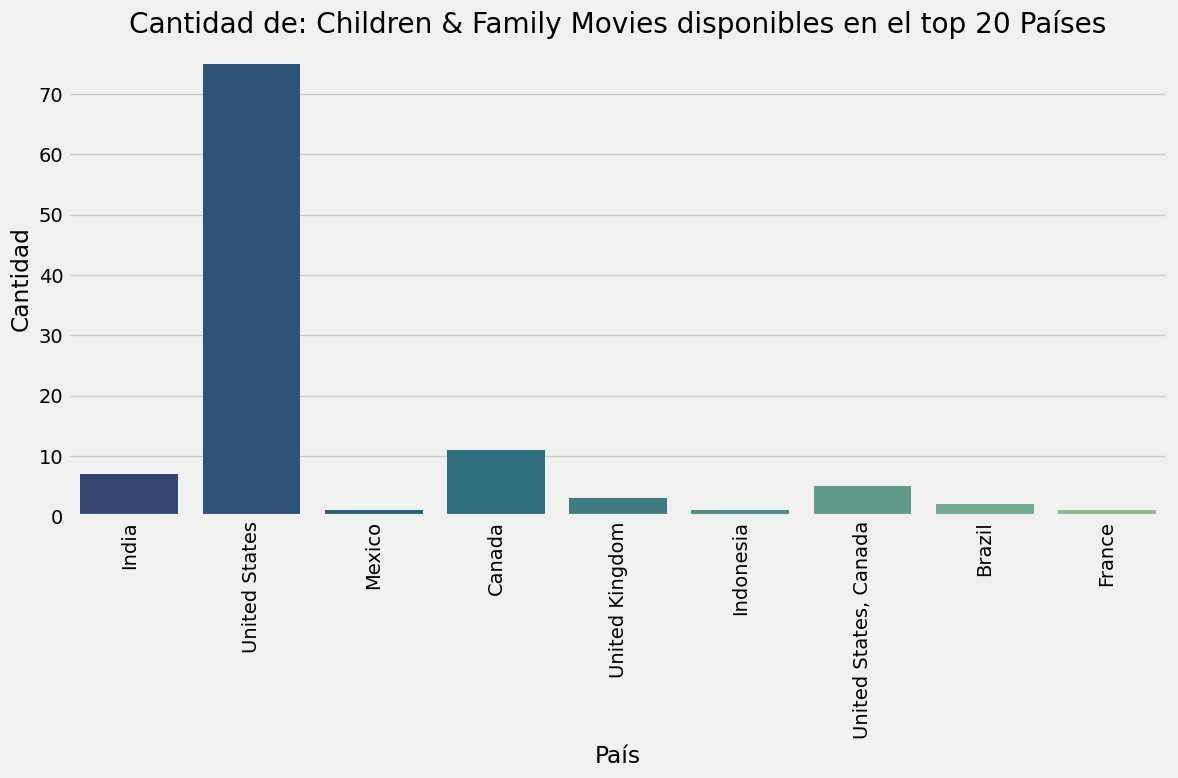

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




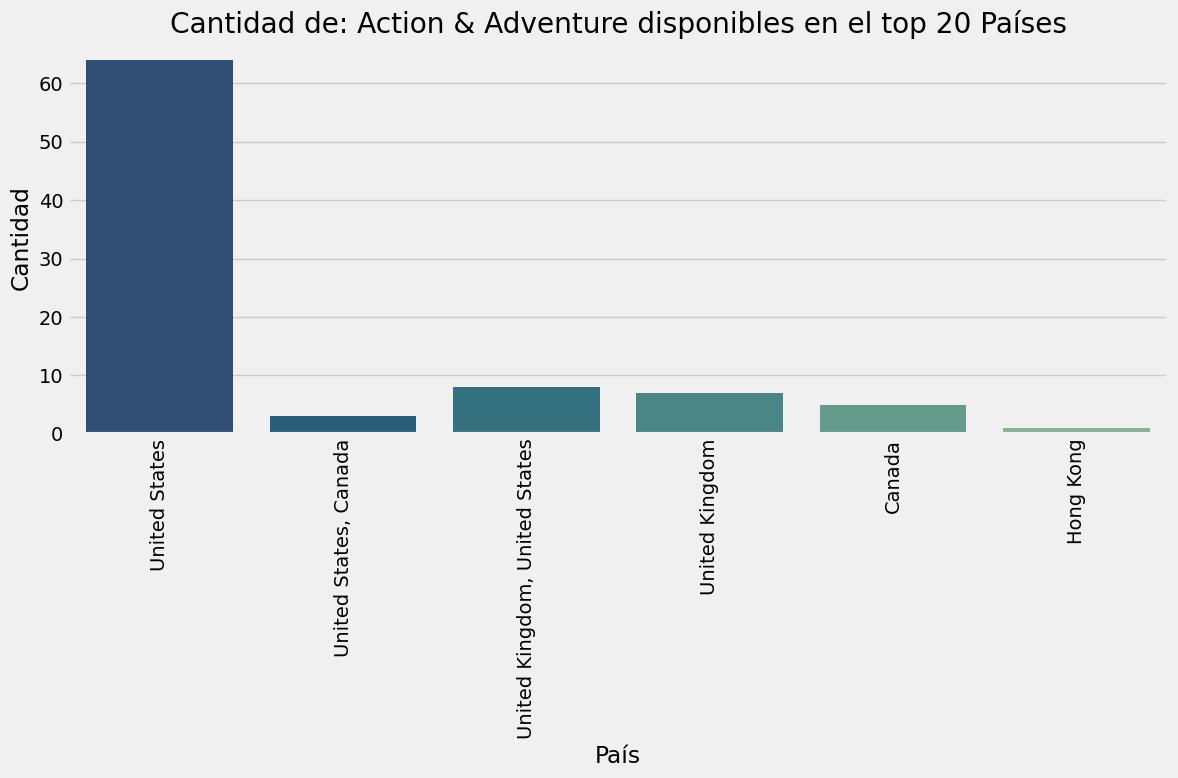

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




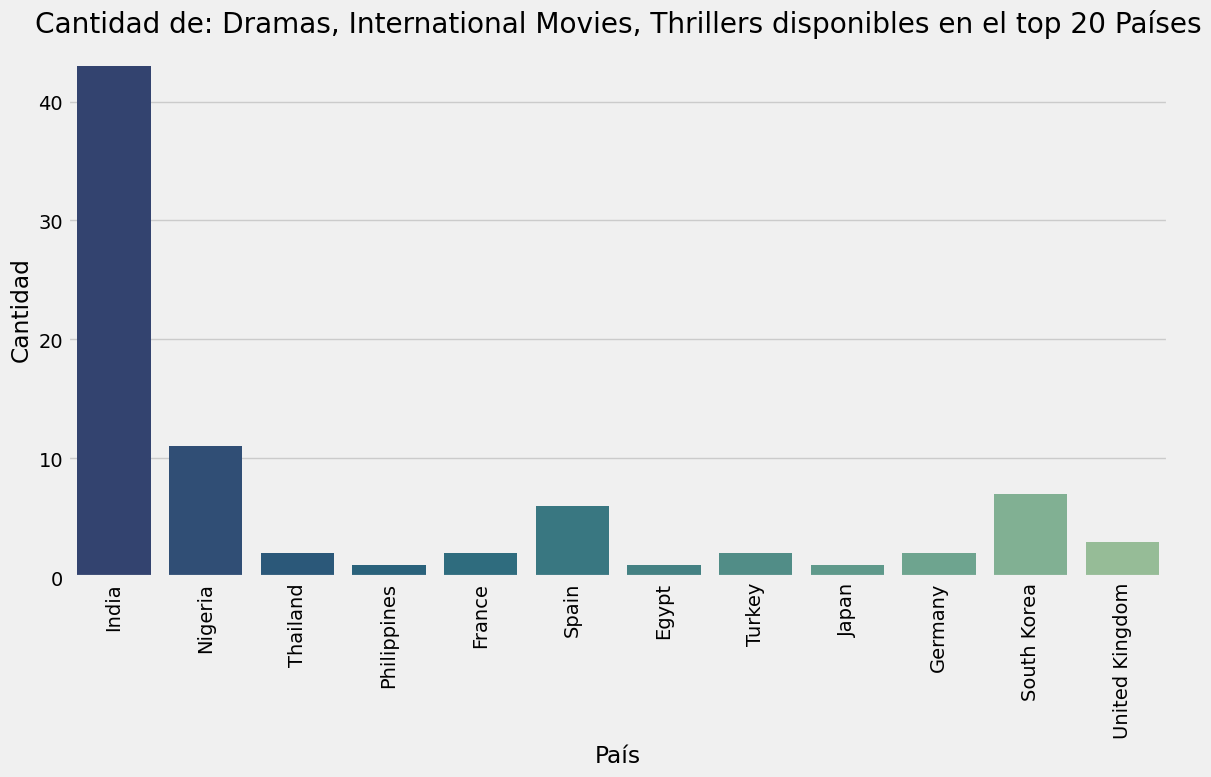

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




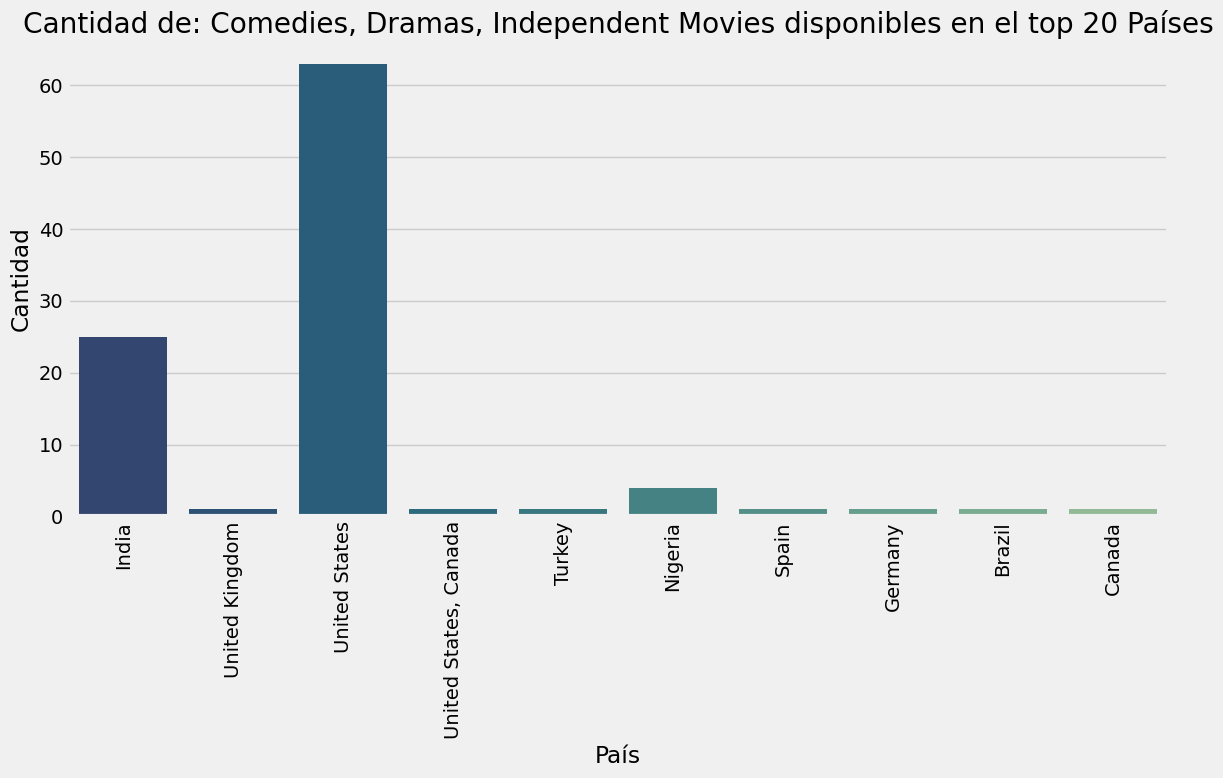

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




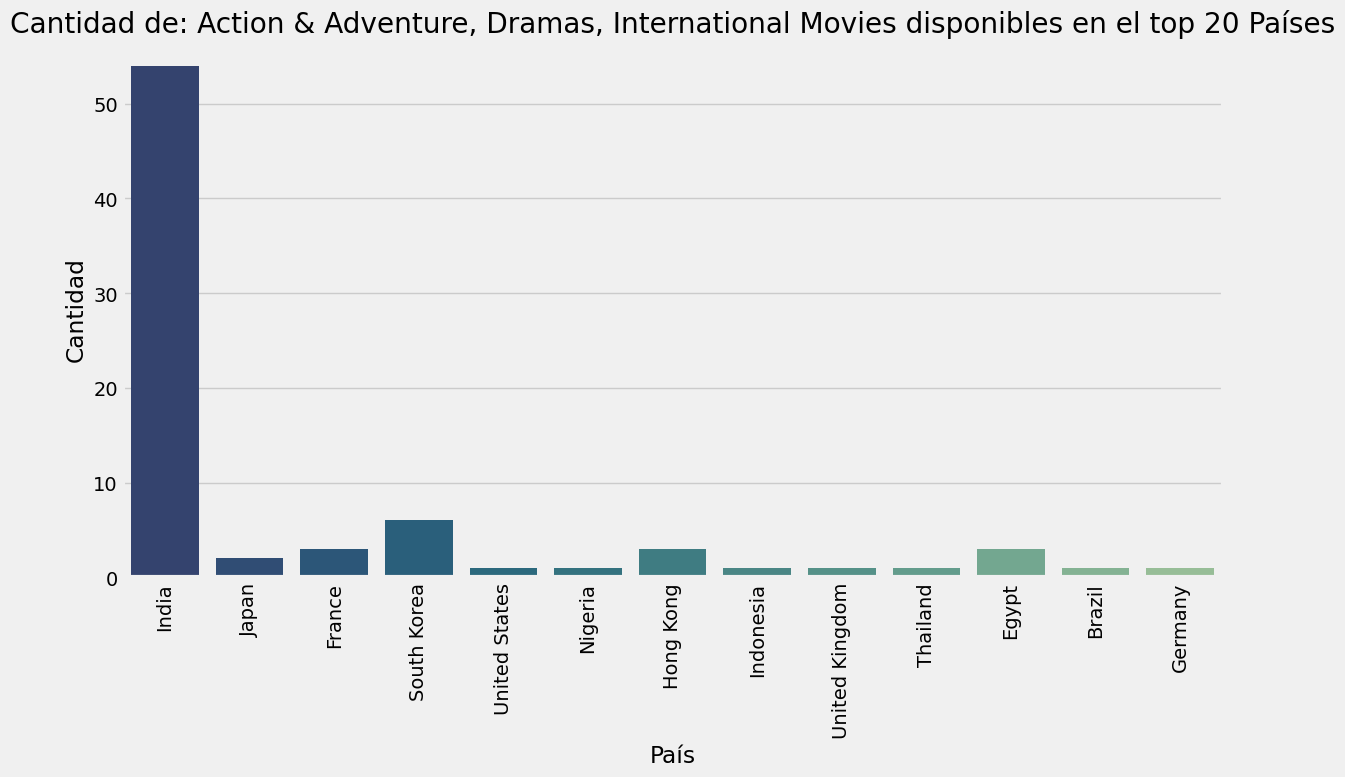

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




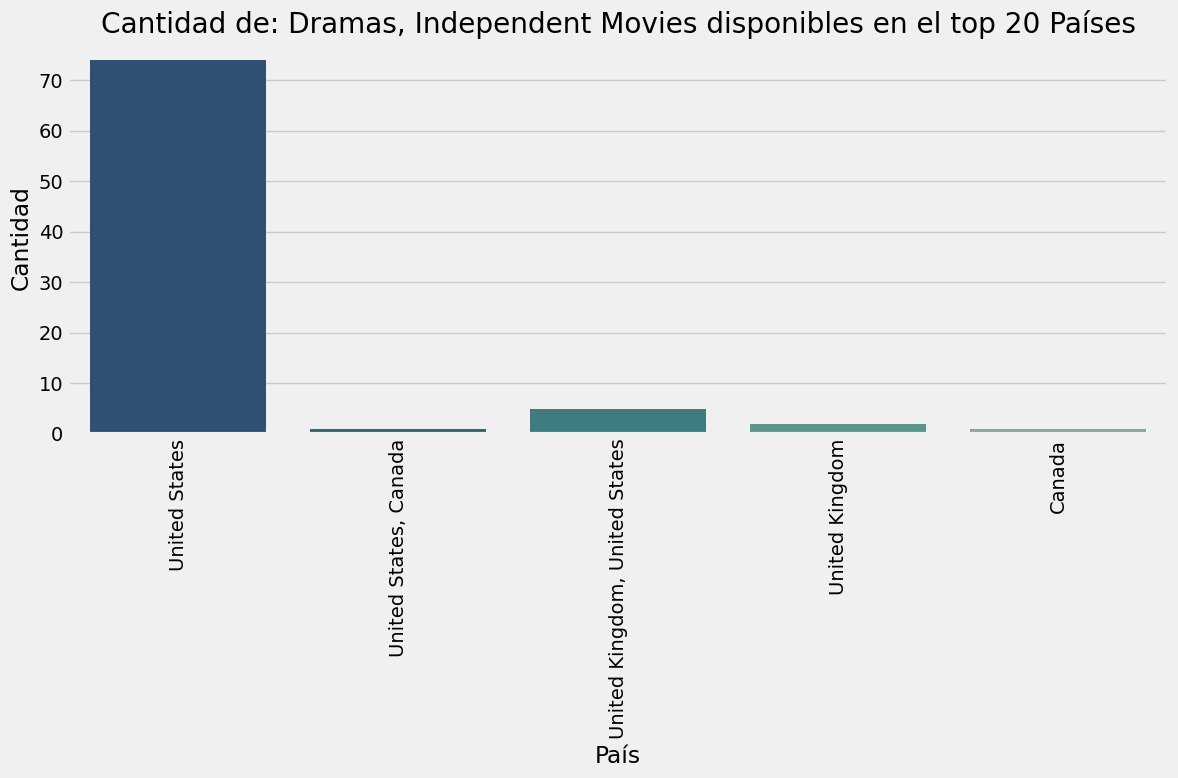

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




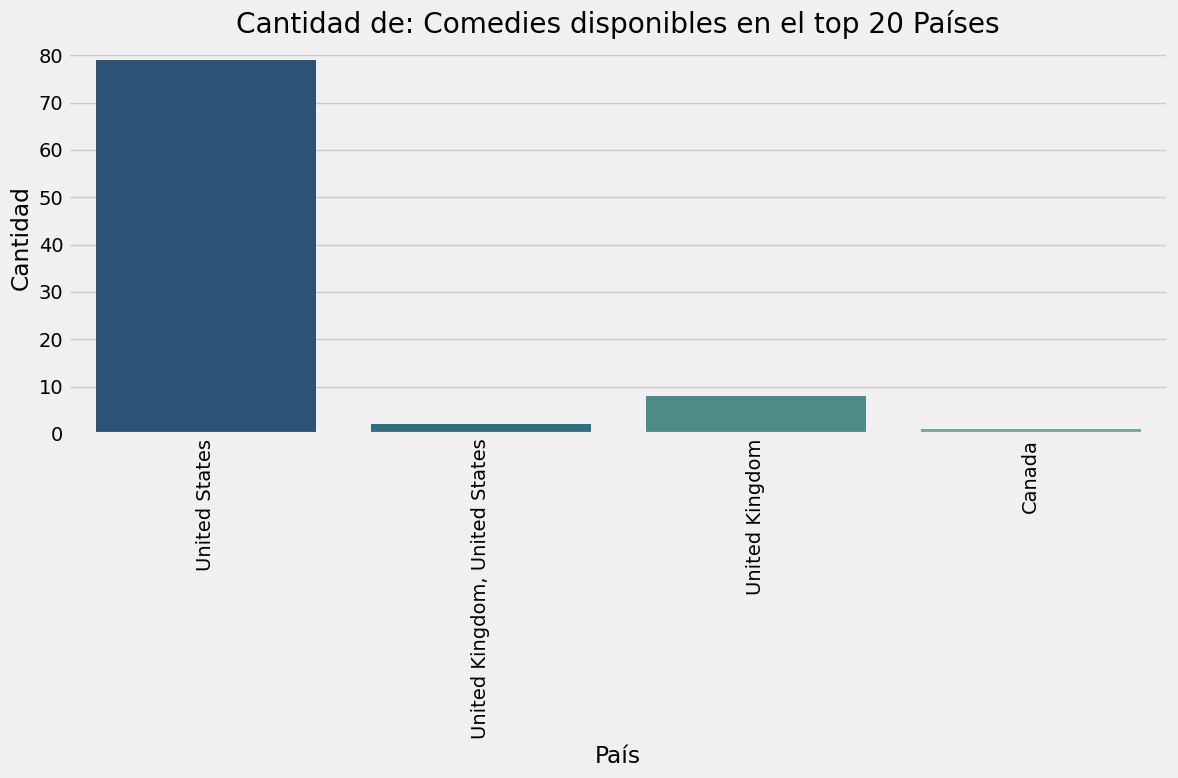

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




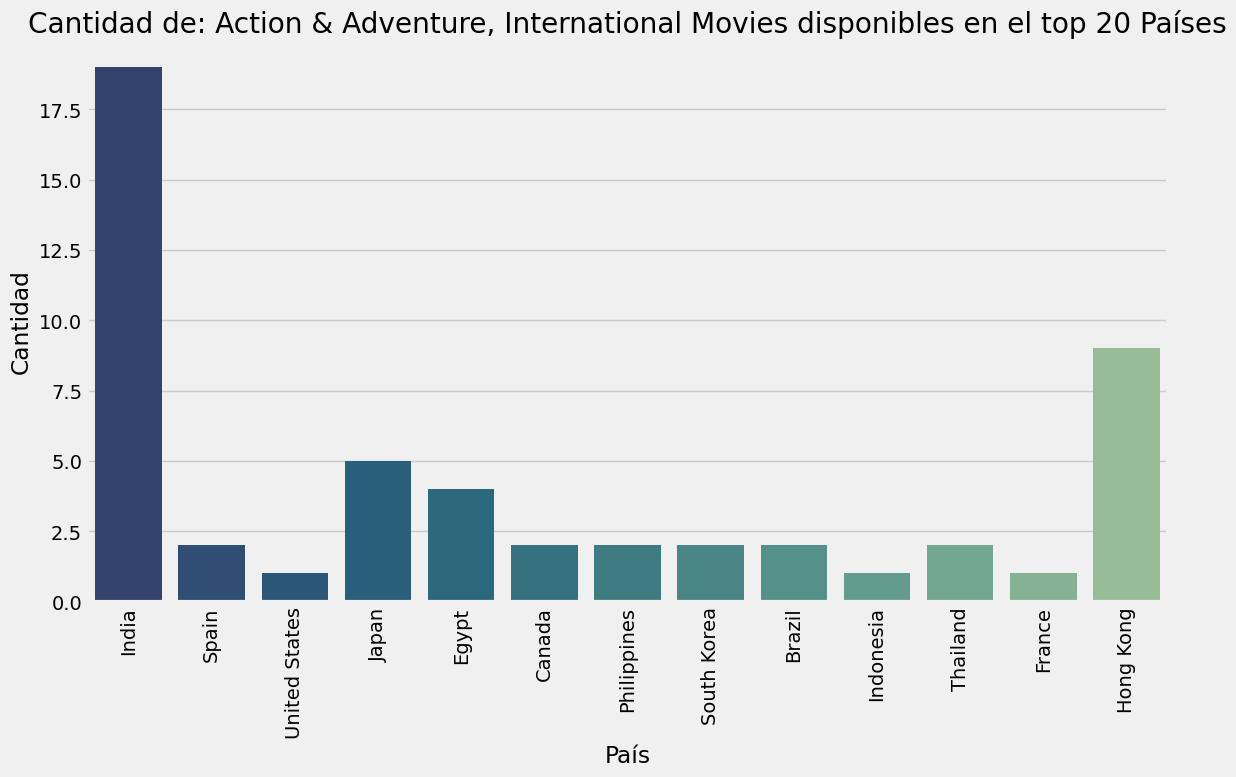

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




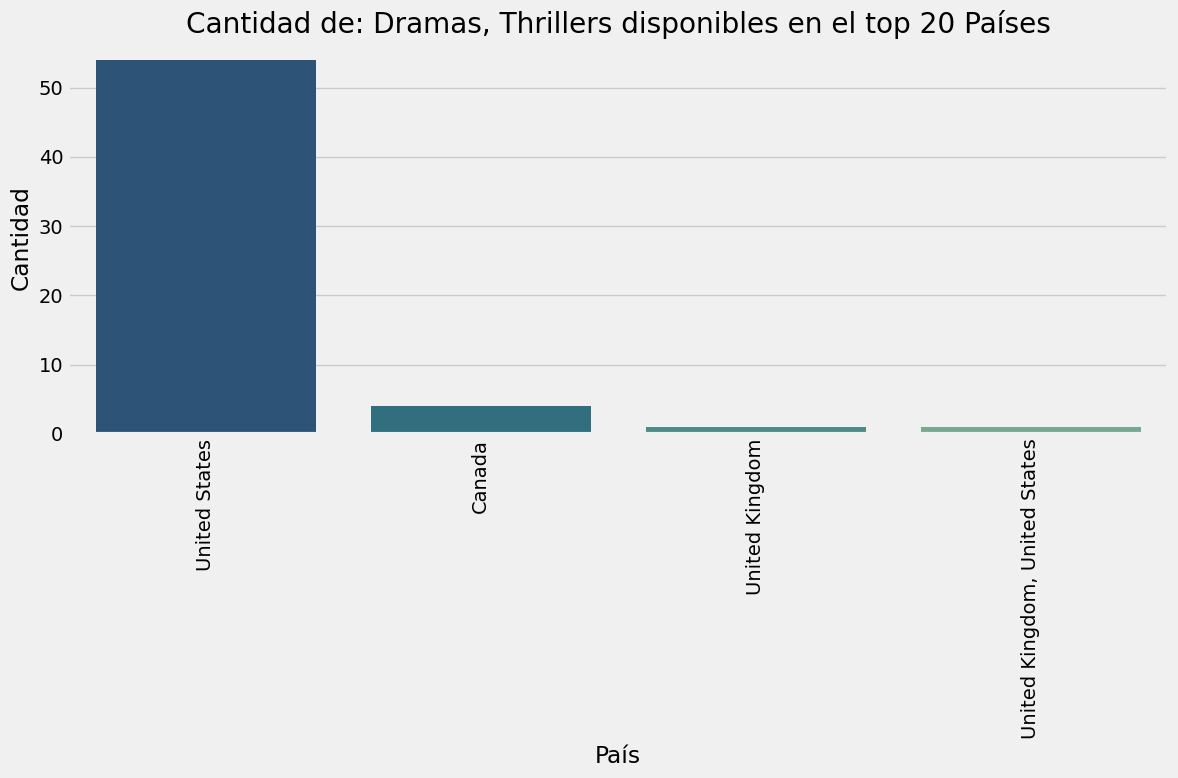

<ipython-input-30-db54400a7662>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




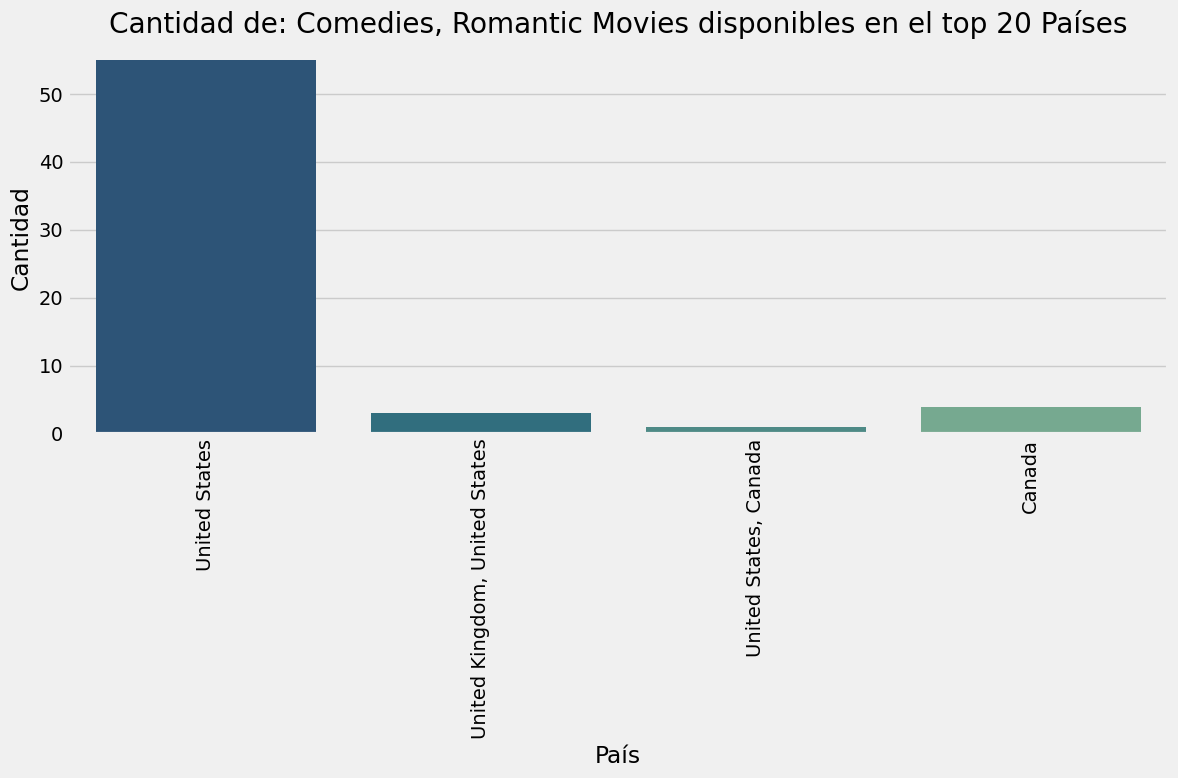

In [30]:
plt.figure(figsize=(12, 8))
top_countries = netflix['country'].value_counts().head(20).index.tolist()
top_listed = netflix['listed_in'].value_counts().head(20).index.tolist()
for genre in top_listed:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=netflix[netflix['country'].isin(top_countries) & (netflix['listed_in'] == genre)], x='country', palette='crest_r')
    plt.title(f'Cantidad de: {genre} disponibles en el top 20 Países')
    plt.xlabel('País')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

**Conclusiones:**
*   A los indios les encantan las comedias y las películas de acción.
*   Los estadounidenses ven de todo.
*   Las películas que más triunfan duran entre 95 y 115 minutos.
*   El país que más títulos genera es Estados Unidos.
*   El género de títulos que más se producen son los dramas, acción y comedias.
*   En 2017 se generaron la mayor cantidad de títulos en un año.